## Importing libraries

In [294]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import cross_val_score,cross_val_predict

## Importing Dataset

In [295]:
data_set = pd.read_csv("FuelConsumptionCo2.csv")


data_set.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Knowing the data

In [296]:

data_set.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [297]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


## Checking the (object type) attributes

In [298]:
vmake=data_set['MAKE']
vmodel=data_set['MODEL']
vclass=data_set['VEHICLECLASS']

In [299]:
vmake.describe()

count     1067
unique      39
top       FORD
freq        90
Name: MAKE, dtype: object

In [300]:
vmodel.describe()

count         1067
unique         663
top       F150 FFV
freq             8
Name: MODEL, dtype: object

In [301]:
vclass.describe()

count         1067
unique          16
top       MID-SIZE
freq           178
Name: VEHICLECLASS, dtype: object

## Spliting the data

In [302]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(data_set, test_size=0.2,random_state=42)

## Checking the correlation between attributes

In [303]:
corr_matrix = data_set.corr(numeric_only=True)
corr_matrix['CO2EMISSIONS'].sort_values(ascending=False)

CO2EMISSIONS                1.000000
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB        0.892129
ENGINESIZE                  0.874154
FUELCONSUMPTION_HWY         0.861748
CYLINDERS                   0.849685
FUELCONSUMPTION_COMB_MPG   -0.906394
MODELYEAR                        NaN
Name: CO2EMISSIONS, dtype: float64

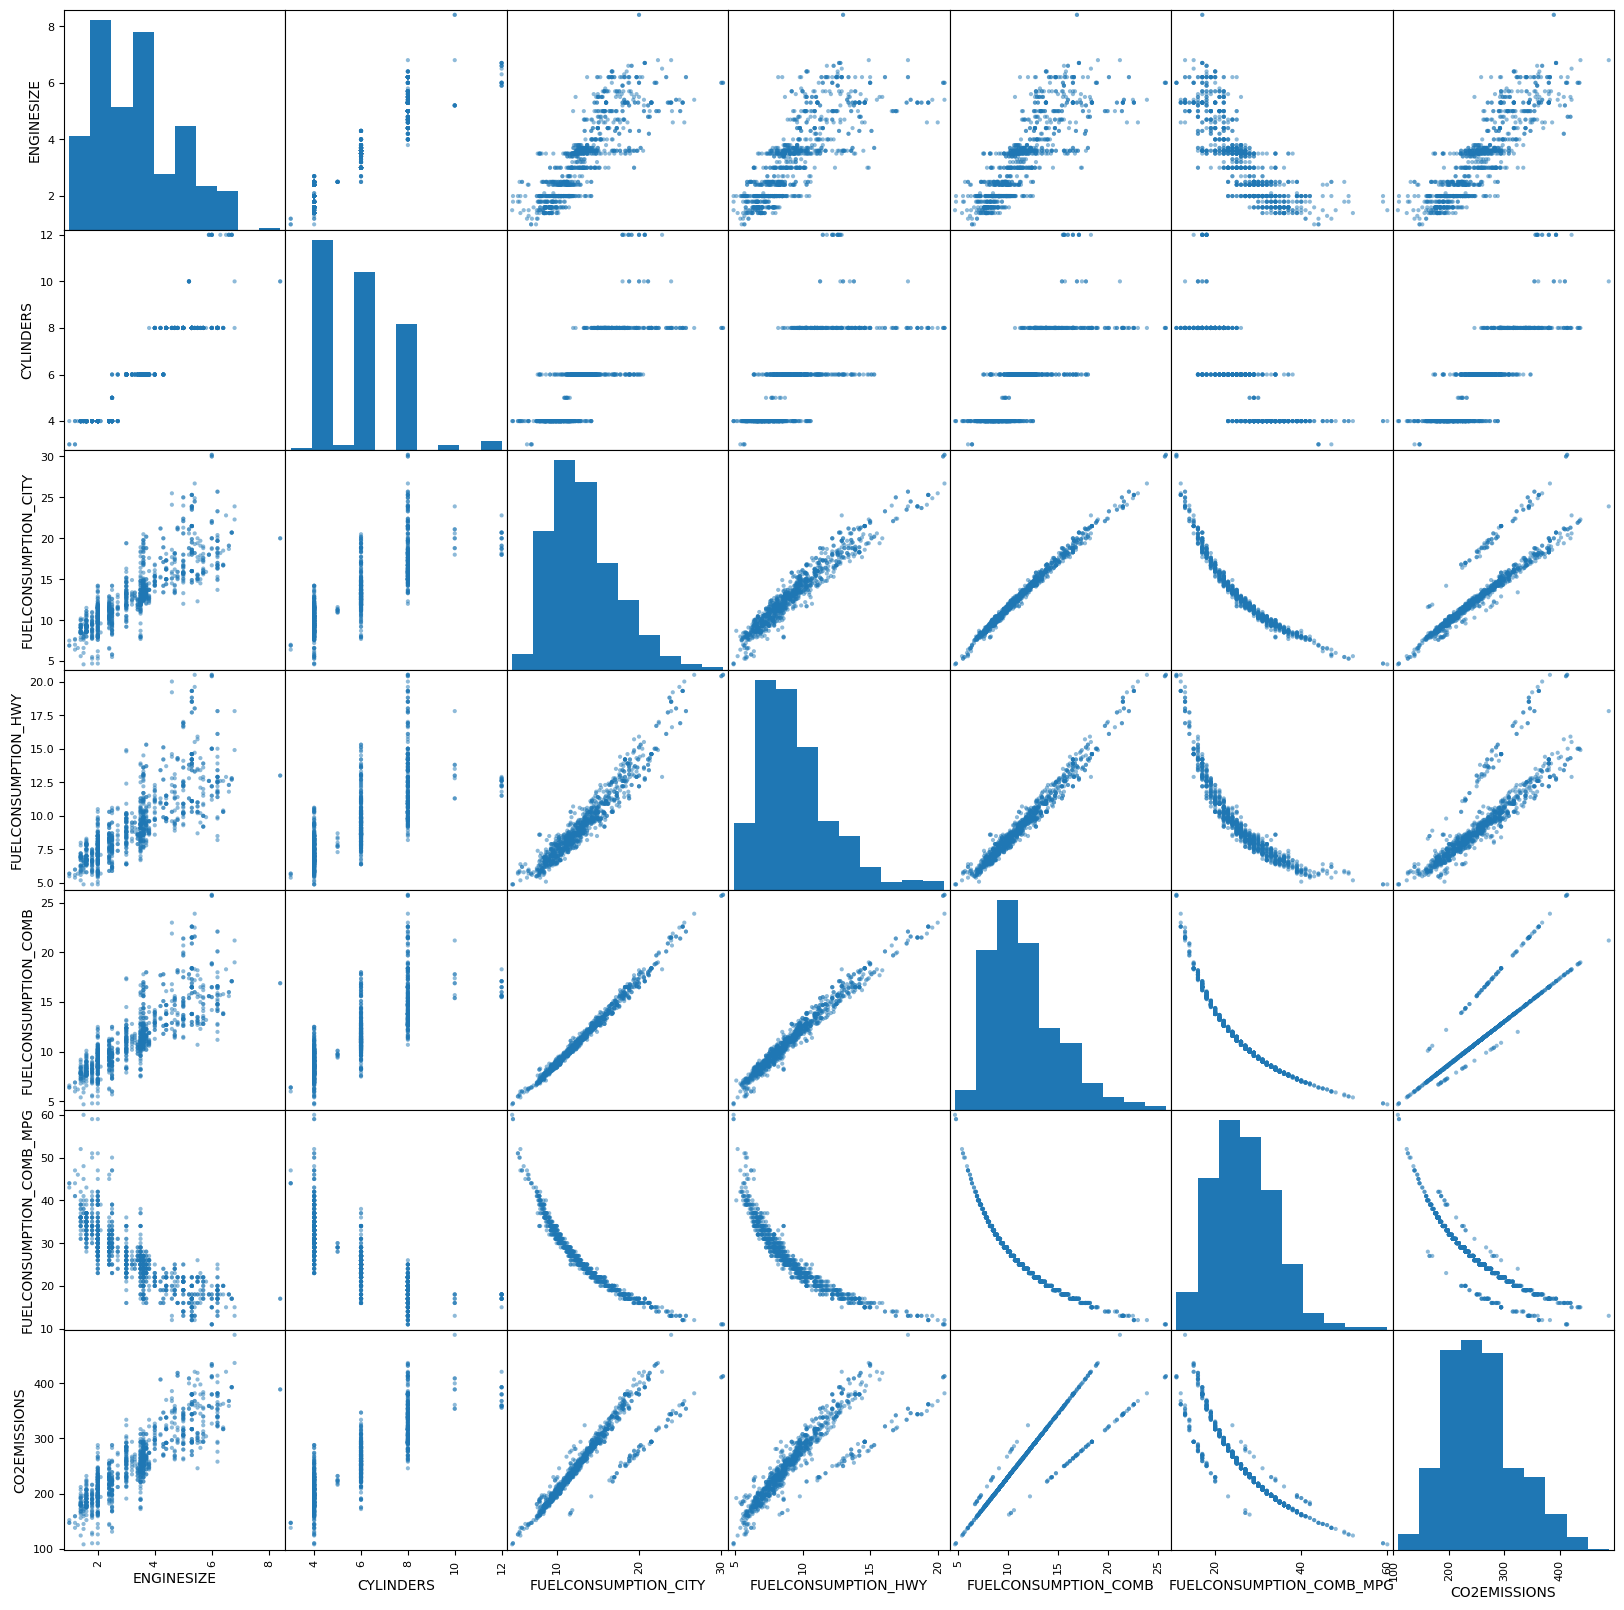

In [304]:
from pandas.plotting import scatter_matrix

attributes='ENGINESIZE CYLINDERS FUELCONSUMPTION_CITY FUELCONSUMPTION_HWY FUELCONSUMPTION_COMB FUELCONSUMPTION_COMB_MPG CO2EMISSIONS'.split()
scatter_matrix(data_set[attributes],figsize=(20,20))
plt.show()

In [305]:

for set_ in (train_set,test_set):
    set_.drop("MAKE", axis=1, inplace=True)
for set_ in (train_set,test_set):
    set_.drop("MODEL", axis=1, inplace=True)
for set_ in (train_set,test_set):
    set_.drop("VEHICLECLASS", axis=1, inplace=True)
for set_ in (train_set,test_set):
    set_.drop("TRANSMISSION", axis=1, inplace=True)
for set_ in (train_set,test_set):
    set_.drop("FUELTYPE", axis=1, inplace=True)

## Scaling the data

In [306]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
hosuing_num_std_scaled=std_scaler.fit_transform(train_set)

In [307]:
x_train=train_set.drop('CO2EMISSIONS',axis=1)
x_test=test_set.drop('CO2EMISSIONS',axis=1)
y_train=train_set['CO2EMISSIONS'].copy()
y_test=test_set['CO2EMISSIONS'].copy()

## Testing diffrent regression models 

In [308]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [309]:
from sklearn.model_selection import cross_val_score
lin_rmses=-cross_val_score(lin_reg,x_train,y_train,scoring='neg_root_mean_squared_error',cv=10)

pd.Series(lin_rmses).describe()


count    10.000000
mean     21.427137
std       2.806849
min      15.755165
25%      20.132554
50%      21.057530
75%      23.617409
max      24.970832
dtype: float64

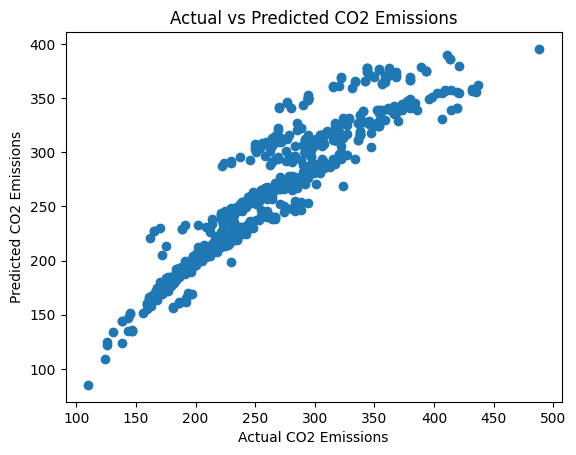

In [310]:
y_pred_lin = cross_val_predict(lin_reg,x_train,y_train,cv=10)
plt.scatter(y_train, y_pred_lin)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

In [311]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [312]:
from sklearn.model_selection import cross_val_score
tree_rmses2=-cross_val_score(tree_reg,x_train,y_train,scoring='neg_root_mean_squared_error',cv=5)
tree_rmses2
pd.Series(tree_rmses2).describe()

count     5.000000
mean     13.840854
std       2.302126
min      11.714245
25%      11.867692
50%      13.020452
75%      16.245377
max      16.356506
dtype: float64

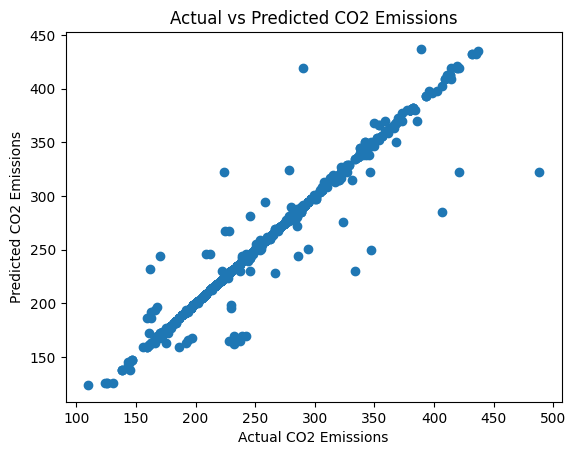

In [313]:
y_pred_tree = cross_val_predict(tree_reg,x_train,y_train,cv=10)
plt.scatter(y_train, y_pred_tree)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

In [314]:
from sklearn.ensemble import RandomForestRegressor
rndm_forest=RandomForestRegressor(random_state=42)
rndm_forest.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [315]:

forest_rmses=-cross_val_score(rndm_forest,x_train,y_train,scoring='neg_root_mean_squared_error',cv=5)
forest_rmses
pd.Series(forest_rmses).describe()

count     5.000000
mean     11.500348
std       3.332089
min       8.081624
25%       9.619519
50%       9.796232
75%      14.065065
max      15.939300
dtype: float64

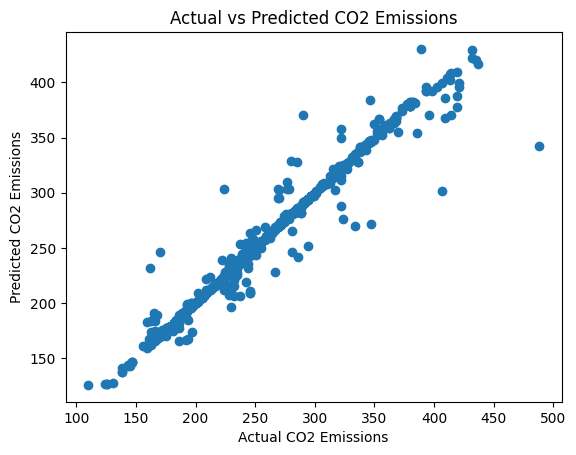

In [316]:
y_pred_forest = cross_val_predict(rndm_forest,x_train,y_train,cv=10)
plt.scatter(y_train, y_pred_forest)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

## Testing on the test set

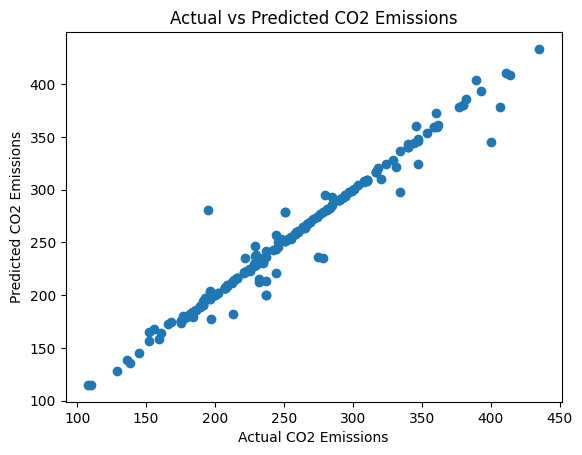

In [319]:
y_test_pred =rndm_forest.predict(x_test)
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()